In [74]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
#Inputting data for merged monthly data
data = pd.read_csv(Path("C:/Users/ritvi/Downloads/Merged Monthly Data.csv"), index_col="Period", infer_datetime_format=True, parse_dates=True)

## Variables Used

In this case we used the variables of Foreign Reserve Differences and CPI Differences as these inputs consider CPI data for both US and Canada. For Exchange rates, both inputs are very important. According to relevant studies, inflation is a key factor for the effect on exchange rates especially in recent times. Along with that, Foreign Reserves held by both countries is also a very important factor to consider as these currencies determine the outlook of Exchange Rates. Reserves act as a shock absorber against factors that can negatively affect a currency's exchange rate, so a nation's central bank uses its currency reserves to help maintain a steady rate, buying or selling depending on which direction they want exchange prices to go. Manipulating and adjusting the reserve levels can enable a central bank to prevent volatile fluctuations in currency by affecting the exchange rate and increasing the demand for and value of the country's currency.

Periodically, the board of governors of a central bank meets and decides on the reserve requirements as a part of monetary policy. The amount that a bank is required to hold in reserve fluctuates depending on the state of the economy and what the governing board determines as the optimal level.

In [3]:
#Showcasing data
data.head()

,Unnamed: 0,Canadian Dollar ($CADUSD) - Rate Value,CAN CPI,US CPI,CAN Foreign Reserves,US Foreign Reserves,Foreign Reserves Difference,Foreign Reserves Difference Percentage,CPI Difference,CPI Difference Percentage
Period,,,,,,,,,,
1971-01-01,0,1.011429,0.99,5.29,3.04,0.49,2.55,-0.838816,-4.30,4.343434
1971-02-01,1,1.009286,1.49,5.00,3.09,0.33,2.76,-0.893204,-3.51,2.355705
1971-03-01,2,1.007742,1.49,4.71,3.17,0.26,2.91,-0.917981,-3.22,2.161074
1971-04-01,3,1.010000,1.97,4.16,3.18,0.26,2.92,-0.918239,-2.19,1.111675
1971-05-01,4,1.010000,1.97,4.40,3.22,0.32,2.90,-0.900621,-2.43,1.233503


## What Do X and y Represent Below:

In the code above, X represents the input data that will be used to make predictions, and y represents the output or target variable that we want to predict.

More specifically, X contains the independent variables, which are the features we want to use to predict the dependent variable y. In this case, X consists of the "Foreign Reserve Differences" and "CPI Differences" columns.

On the other hand, y represents the dependent variable, which is the value we want to predict. In this case, y is the "Close" column, which represents the closing exchange rate between the Canadian dollar and the US dollar.

In [73]:
#Splitting variables into X and y, y is the value we are trying to build for
X = data[['Foreign Reserves Difference','CPI Difference']]
y = data['Canadian Dollar ($CADUSD) - Rate Value']

In [72]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Utilizing Random Forest

Random forest is a popular machine learning algorithm that uses an ensemble of decision trees to make predictions. It is a type of bagging algorithm where multiple decision trees are trained on random subsets of the training data, and their predictions are combined to make a final prediction.In a random forest, each tree is constructed using a random subset of the features, which helps to reduce the correlation between the trees and improve their accuracy. The algorithm also uses a technique called bootstrapping, where each tree is trained on a random sample of the training data with replacement.

Random forest is a versatile algorithm that can be used for both classification and regression tasks, and is particularly well-suited to handle high-dimensional data with many features. It is also less prone to overfitting than individual decision trees, and can handle missing data and outliers effectively. Overall, random forest is a powerful and widely-used machine learning algorithm with a strong track record of success in various applications.

In [37]:
# train random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=980)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=980)

In [38]:
# make predictions
y_pred = rf.predict(X_test)

In [39]:
# calculate R-squared
r2 = r2_score(y_test, y_pred)

In [42]:
# determine recommendation based on predicted value
last_price = data.iloc[-1]['Canadian Dollar ($CADUSD) - Rate Value']
predicted_price = rf.predict(X.iloc[[-1]][['Foreign Reserves Difference','CPI Difference']])[0]

if predicted_price > last_price:
    recommendation = 'BUY'
else:
    recommendation = 'SELL'

In [43]:
# print recommendation and R-squared
print('Recommendation:', recommendation)
print('R-squared:', r2)

Recommendation: SELL
R-squared: 0.4615664997487039


## <b> Utilizing Gradient Boosting </b>

Gradient Boosting is a machine learning algorithm that is used for both regression and classification problems. It works by iteratively adding decision trees to an ensemble, where each new tree tries to correct the mistakes of the previous trees. Gradient Boosting starts with a single decision tree and evaluates its performance on the training set. The next tree is then built to correct the errors of the first tree. This process continues until a specified number of trees have been built, or until a predefined threshold of performance is achieved.In Gradient Boosting, the decision trees are typically shallow, which means they have few levels and only a few decision rules. This helps to prevent overfitting of the data, and the shallow trees are combined to form a more powerful model.

One of the key features of Gradient Boosting is that it uses a gradient descent algorithm to minimize the loss function. This allows the algorithm to converge quickly and to find the best parameters for the model.Gradient Boosting is a popular algorithm in machine learning due to its high accuracy, ability to handle large datasets, and flexibility in handling different types of data.

In [44]:
# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=980)

In [45]:
# Fit the model to the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=980)

In [46]:
# Predict the exchange rate for the testing data
y_pred = gbr.predict(X_test)

In [47]:
# Evaluate the performance of the model using Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  0.01407615857384792
R^2 Score:  0.43350510836242717


In [48]:
# Predict the exchange rate for the next 3 months
next_3_months = X[-3:]
future_predictions = gbr.predict(next_3_months)
print("Predictions for next 3 months: ", future_predictions)

Predictions for next 3 months:  [1.33351847 1.32640751 1.32778091]


## <b> Utilizing Support Vector Machines </b>

Support Vector Machines (SVM) is a popular machine learning algorithm used for both classification and regression tasks. SVM seeks to find a hyperplane in the input space that separates the data into different classes or predicts the target variable values. The main objective of SVM is to maximize the margin between the classes or to minimize the classification error. SVM works by mapping the input data to a high-dimensional feature space, where a decision boundary is determined to separate the data into classes. SVM has different kernel functions such as linear, polynomial, and radial basis function (RBF) kernel, which can be used to map the data into the feature space. The SVM algorithm finds the optimal hyperplane that maximizes the distance between the closest points of each class. These points are called support vectors. The distance between the hyperplane and the support vectors is called the margin. A larger margin indicates better generalization performance of the model.

In addition to classification tasks, SVM can also be used for regression tasks by modifying the objective function to minimize the deviation of the predicted target variable values from the actual values. SVM regression is based on finding a hyperplane that maximizes the margin of the support vectors, while also ensuring that the predicted target values lie within a certain distance of the hyperplane. Overall, SVM is a powerful machine learning algorithm that can handle both linear and non-linear problems, and can be used for both classification and regression tasks. SVM has been widely used in various applications, such as image classification, text classification, and financial prediction.

In [56]:
# Train the SVM model
svm = SVR(kernel='linear', C=1.0, epsilon=0.1)
svm.fit(X_train, y_train)

SVR(kernel='linear')

In [57]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R^2: ', r2)

MSE:  0.024065206139491566
RMSE:  0.15512964300703966
R^2:  0.03149596726229553


## <b> Utilizing K-Nearest Neighbours </b>

K-Nearest Neighbors (KNN) is a machine learning algorithm used for both classification and regression tasks. KNN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution, which makes it useful in scenarios where the data is highly irregular and hard to model using other algorithms.The algorithm works by finding the K number of training samples in the feature space that are closest to the new input data point, and then predicts the output value based on the average or majority of the labels of those K nearest samples. The distance between two data points can be measured using various distance metrics such as Euclidean, Manhattan, or Hamming distance.

One of the advantages of the KNN algorithm is that it's simple and easy to understand and implement. It also performs well on small to medium-sized datasets with low dimensions. However, it can be computationally expensive and slow on large datasets with high dimensions, and it may also suffer from the curse of dimensionality. Choosing the optimal value of K is also crucial, as too small or too large K values can affect the accuracy and generalization of the model.

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=980)

In [60]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [62]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [63]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R^2:', r2)

MSE: 0.010198597235968169
R^2: 0.554320634676126


## <b> Working all the models together to evaluate the best model </b>

MAE, MSE, RMSE, and R-squared are common evaluation metrics used in machine learning regression problems.

MAE (Mean Absolute Error) is the average absolute difference between the predicted values and the actual values. It measures the average magnitude of the errors in a set of predictions, without considering their direction. The lower the MAE value, the better the model's performance.

MSE (Mean Squared Error) is the average of the squared differences between the predicted values and the actual values. It measures the average squared difference between the predicted and actual values, and it penalizes larger errors more heavily than smaller ones. The lower the MSE value, the better the model's performance.

RMSE (Root Mean Squared Error) is the square root of the MSE. It measures the standard deviation of the residuals (prediction errors). The lower the RMSE value, the better the model's performance.

R-squared (Coefficient of Determination) is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. A value of 1 means that the model explains all the variability of the response data around its mean. A value of 0 means that the model explains none of the variability.

In general, it is better to have lower values for MAE, MSE, and RMSE, as it indicates a smaller prediction error. For R-squared, a higher value indicates a better fit of the model to the data, but it's important to note that a high R-squared does not necessarily mean that the model is a good predictor, as it may be overfitting the data.

In [76]:
# Initialize models
rf_model = RandomForestRegressor(random_state=980)
gb_model = GradientBoostingRegressor(random_state=980)
nn_model = MLPRegressor(random_state=980)
svm_model = SVR()
knn_model = KNeighborsRegressor()
lr_model = LinearRegression()

models = [('Random Forest', rf_model), ('Gradient Boosting', gb_model), 
          ('Neural Networks', nn_model), ('Support Vector Machines', svm_model), 
          ('K-Nearest Neighbors', knn_model), ('Linear Regression', lr_model)]

In [77]:
# Train and evaluate models
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R-squared:', r2_score(y_test, y_pred))
    print('\n')

Random Forest
MAE: 0.06996682235017408
MSE: 0.013378894395852917
RMSE: 0.11566717077828487
R-squared: 0.4615664997487039


Gradient Boosting
MAE: 0.07321535132861
MSE: 0.01407615857384792
RMSE: 0.118642987883178
R-squared: 0.43350510836242717


Neural Networks
MAE: 0.08699918238518414
MSE: 0.015283956756308845
RMSE: 0.12362830079034834
R-squared: 0.38489727996210965


Support Vector Machines
MAE: 0.08677866817744576
MSE: 0.013802440977708564
RMSE: 0.11748379027639755
R-squared: 0.44452087087680714


K-Nearest Neighbors
MAE: 0.06650080667701253
MSE: 0.01175451611120965
RMSE: 0.10841824620980386
R-squared: 0.5269395911009891


Linear Regression
MAE: 0.13187372305973857
MSE: 0.02439522610553761
RMSE: 0.15618971190682698
R-squared: 0.01821431631167103




## Evaluation

From the above models, R-squared is the highest with K-Nearest Neighbors, so it is best to Utilize K-Nearest Neighbors. Other metrics such as MAE, MSE, and RMSE are also lower with Random Forest in comparison to other models. The data inputs in this case are considerably lower as we look at monthly data. So to give us better accuracy in Machine Learning, we would then consider daily data.

In [83]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

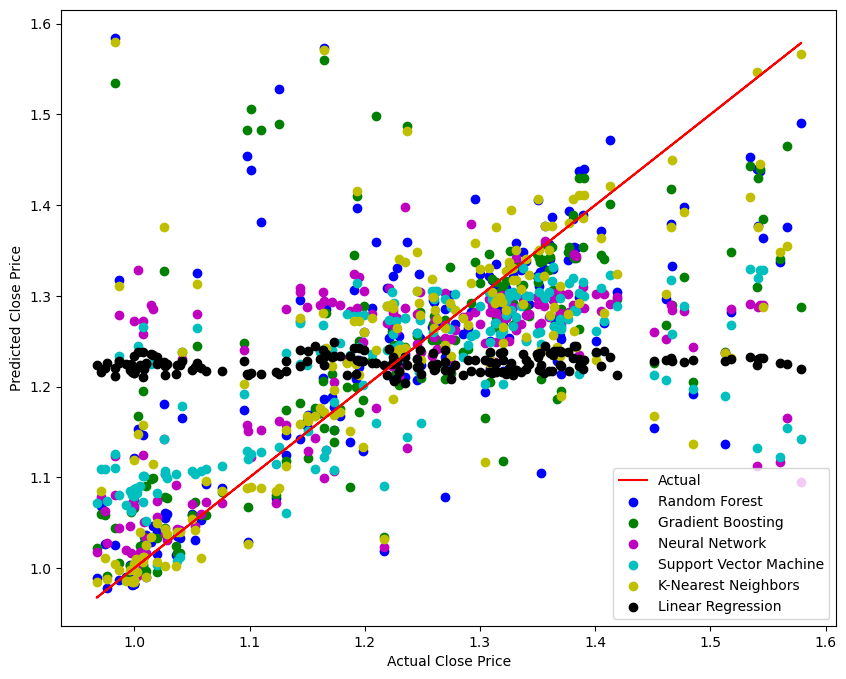

In [84]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for each model
plt.figure(figsize=(10, 8))
plt.plot(y_test, y_test, 'r-', label='Actual')
plt.scatter(y_test, y_pred_rf, color='b', label='Random Forest')
plt.scatter(y_test, y_pred_gb, color='g', label='Gradient Boosting')
plt.scatter(y_test, y_pred_nn, color='m', label='Neural Network')
plt.scatter(y_test, y_pred_svm, color='c', label='Support Vector Machine')
plt.scatter(y_test, y_pred_knn, color='y', label='K-Nearest Neighbors')
plt.scatter(y_test, y_pred_lr, color='k', label='Linear Regression')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()